<a href="https://colab.research.google.com/github/juansokil/Deep_Learning/blob/master/ObjectDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
## Import the required libraries 

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import preprocess_input
from keras.utils.data_utils import GeneratorEnqueuer
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import math, os

%matplotlib inline

In [0]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np


In [0]:
###Generador de Imagenes###
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest', validation_split=0.3)

####FLOW FROM DIRECTORY SIRVE CUANDO TENGO LAS CLASES DIVIDIDAS EN CARPETAS#####
###debo cargar una carpeta entera###

train_generator = datagen.flow_from_directory(
        '/mnt/c/source/digitalhouse/images/',
        batch_size=32,
        target_size=(200, 200),
        color_mode = 'grayscale')

Found 41 images belonging to 3 classes.


In [0]:
img_generator = GeneratorEnqueuer(train_generator)
img_generator.start()
img_generator = img_generator.get()

from imageai.Detection import ObjectDetection
model_weight_path = "resnet50_v2.0.1.h5"

execution_path = os.getcwd()
detector = ObjectDetection()
detector.setModelTypeAsRetinaNet()
detector.setModelPath(model_weight_path)
detector.loadModel()


Aplicar el codigo 

In [0]:
import glob
path = glob.glob("/mnt/c/Source/deep_learning/partidos_politicos/train/mauriciomacri/*.jpg")
cosas = []
imagen = []
for image in path:
    result=detector.detectObjectsFromImage(input_image=image, output_image_path= image + "with_box.png" , minimum_percentage_probability = 40)
    print(image)
    imagen.append(image)
    cosas.append(result)    

imagen_macri=imagen    
cosas_macri=cosas

In [0]:
import pandas as pd

objetos_macri = pd.DataFrame({'Nombre_imagen':imagen_macri,'Objetos':cosas_macri})
objetos_macri.head()

,Nombre_imagen,Objetos
0,/mnt/c/Source/deep_learning/partidos_politicos...,"[{'name': 'person', 'percentage_probability': ..."
1,/mnt/c/Source/deep_learning/partidos_politicos...,"[{'name': 'person', 'percentage_probability': ..."
2,/mnt/c/Source/deep_learning/partidos_politicos...,"[{'name': 'cup', 'percentage_probability': '96..."
3,/mnt/c/Source/deep_learning/partidos_politicos...,"[{'name': 'person', 'percentage_probability': ..."
4,/mnt/c/Source/deep_learning/partidos_politicos...,"[{'name': 'person', 'percentage_probability': ..."


In [0]:
objetos_macri['Objetos'][2]

[{'name': 'cup', 'percentage_probability': '96.27968072891235'},
 {'name': 'bowl', 'percentage_probability': '51.36212706565857'},
 {'name': 'person', 'percentage_probability': '78.72292995452881'},
 {'name': 'person', 'percentage_probability': '94.02972459793091'},
 {'name': 'dining table', 'percentage_probability': '64.43065404891968'}]

In [0]:
objetos_macri.to_csv('objetos_macri.csv', index=False)

Ejemplo de una imagen con objetos identificados

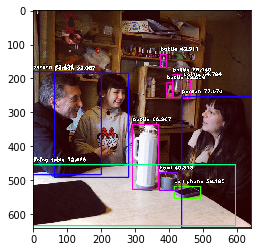

In [0]:
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img

img = image.load_img('/mnt/c/Source/deep_learning/partidos_politicos/train/mauriciomacri/10632525_532722823496067_1957746727_n.jpgwith_box.png')
plt.imshow(img)
plt.show()